# What are Dimension Reduction techniques?

Dimension Reduction refers to the process of converting a set of data having vast dimensions(features) into data with lesser dimensions(features) ensuring that it conveys similar information concisely. These techniques are typically used while solving 'machine learning problems' to obtain better features for a classification or regression task.

# What are the benefits of Dimension Reduction?

Let’s look at the benefits of applying Dimension Reduction process:

- It helps in data compressing and reducing the storage space required.

- It fastens the time required for performing same computations. Less dimensions leads to less computing, also less dimensions can allow usage of algorithms unfit for a large number of dimensions.

- It takes care of multi-collinearity that improves the model performance. It removes redundant features. For example: there is no point in storing a value in two different units (meters and inches).

- Reducing the dimensions of data to 2D or 3D may allow us to plot and visualize it precisely. You can then observe patterns more clearly. Below you can see that, how a 3D data is converted into 2D. First it has identified the 2D plane then represented the points on these two new axis z1 and z2.

# What are the common methods to perform Dimension Reduction?

There are many methods to perform Dimension reduction. Below are listed the most common methods below:

**1. Missing Values:** While exploring data, if we encounter missing values, what we do? Our first step should be to identify the reason then impute missing values/ drop variables using appropriate methods. But, what if we have too many missing values? Should we impute missing values or drop the variables? I would prefer the latter, because it would not have lot more details about data set. Also, it would not help in improving the power of model. Next question, is there any threshold of missing values for dropping a variable? It varies from case to case. If the information contained in the variable is not that much, you can drop the variable if it has more than ~40-50% missing values.

**2. Low Variance:** Let’s think of a scenario where we have a constant variable (all observations have same value, 5) in our data set. Do you think, it can improve the power of model? Ofcourse NOT, because it has zero variance. In case of high number of dimensions, we should drop variables having low variance compared to others because these variables will not explain the variation in target variables.

**3. Decision Trees:** It is one of my favorite techniques. It can be used as a ultimate solution to tackle multiple challenges like missing values, outliers and identifying significant variables. It worked well in our Data Hackathon also. Several data scientists used decision tree and it worked well for them.

**4. Random Forest:** Similar to decision tree is Random Forest. I would also recommend using the in-built feature importance provided by random forests to select a smaller subset of input features. Just be careful that random forests have a tendency to bias towards variables that have more no. of distinct values i.e. favor numeric variables over binary/categorical values.

**5. High Correlation:** Dimensions exhibiting higher correlation can lower down the performance of model. Moreover, it is not good to have multiple variables of similar information or variation also known as “Multicollinearity”. You can use Pearson (continuous variables) or Polychoric (discrete variables) correlation matrix to identify the variables with high correlation and select one of them using VIF (Variance Inflation Factor). Variables having higher value ( VIF > 5 ) can be dropped.

**6. Backward Feature Elimination:** In this method, we start with all n dimensions. Compute the sum of square of error (SSR) after eliminating each variable (n times). Then, identifying variables whose removal has produced the smallest increase in the SSR and removing it finally, leaving us with n-1 input features. Repeat this process until no other variables can be dropped. Recently in Online Hackathon organised by Analytics Vidhya (11-12 Jun’15), Data scientist who held second position used Backward Feature Elimination in linear regression to train his model. Reverse to this, we can use “Forward Feature Selection” method. In this method, we select one variable and analyse the performance of model by adding another variable. Here, selection of variable is based on higher improvement in model performance.

**7. Factor Analysis:** Let’s say some variables are highly correlated. These variables can be grouped by their correlations i.e. all variables in a particular group can be highly correlated among themselves but have low correlation with variables of other group(s). Here each group represents a single underlying construct or factor. These factors are small in number as compared to large number of dimensions. However, these factors are difficult to observe. There are basically two methods of performing factor analysis: EFA (Exploratory Factor Analysis) and CFA (Confirmatory Factor Analysis)

**8. Principal Component Analysis (PCA):** In this technique, variables are transformed into a new set of variables, which are linear combination of original variables. These new set of variables are known as principle components. They are obtained in such a way that first principle component accounts for most of the possible variation of original data after which each succeeding component has the highest possible variance. The second principal component must be orthogonal to the first principal component. In other words, it does its best to capture the variance in the data that is not captured by the first principal component. For two-dimensional dataset, there can be only two principal components.

# Dimensionality Reduction and Visualization

Dimensionality reduction is the task of deriving a set of new
artificial features that is smaller than the original feature
set while retaining most of the variance of the original data.
Here we'll use a common but powerful dimensionality reduction
technique called Principal Component Analysis (PCA).
We'll perform PCA on the iris dataset that we saw before:

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

PCA is performed using linear combinations of the original features
using a truncated Singular Value Decomposition of the matrix X so
as to project the data onto a base of the top singular vectors.
If the number of retained components is 2 or 3, PCA can be used
to visualize the dataset:

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)

Once fitted, the pca model exposes the singular vectors in the components_ attribute:

In [43]:
pca.components_                           

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [45]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [46]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

Let us project the iris dataset along those first two dimensions:

In [48]:
X_pca = pca.transform(X)

The dataset has been “normalized”, which means that the data
is now centered on both components with unit variance:

In [49]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([-0.,  0.])

In [50]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 1.,  1.])

Furthermore the samples components do no longer carry any linear correlation:

In [51]:
np.round(np.corrcoef(X_pca.T), decimals=5)

array([[ 1., -0.],
       [-0.,  1.]])

We can visualize the projection using pylab, but first
let's make sure our ipython notebook is in pylab inline mode

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Now we can visualize the results using the following utility function:

In [53]:
import pylab as pl
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

Now calling this function for our data, we see the plot:

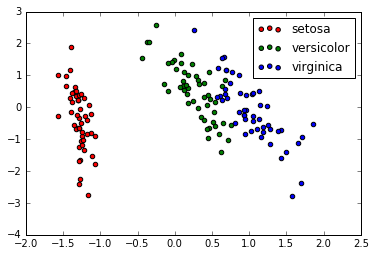

In [54]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is unsupervised.  Nevertheless, we see that the projection gives us insight
into the distribution of the different flowers in parameter space: notably,
*iris setosa* is much more distinct than the other two species.

Note also that the default implementation of PCA computes the SVD of the full
data matrix, which is not scalable when both ``n_samples`` and
``n_features`` are big (more that a few thousands).
If you are interested in a number of components that is much
smaller than both ``n_samples`` and ``n_features``, consider using
:class:`sklearn.decomposition.RandomizedPCA` instead.

### Exercise:

Repeat the above dimensionality reduction with
``sklearn.decomposition.RandomizedPCA``.

You can re-use the ``plot_PCA_2D`` function from above.
Are the results similar to those from standard PCA?

In [57]:
from sklearn.decomposition import RandomizedPCA
#apply randomized PCA to the iris data as above, and plot the result.
Rpca = RandomizedPCA(n_components=2, whiten=True).fit(X)

In [58]:
Rpca.components_

array([[ 0.17650757, -0.04015901,  0.41812992,  0.17516725],
       [ 1.33840478,  1.48757227, -0.35831476, -0.15229463]])

In [59]:
Rpca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [61]:
Rpca.explained_variance_ratio_.sum()

0.97763177502480403

In [64]:
X_rpca = Rpca.transform(X)

In [65]:
np.round(X_rpca.mean(axis=0), decimals=5)

array([-0., -0.])

In [66]:
np.round(np.corrcoef(X_rpca.T), decimals=5)

array([[ 1.,  0.],
       [ 0.,  1.]])

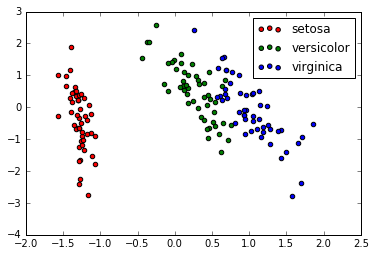

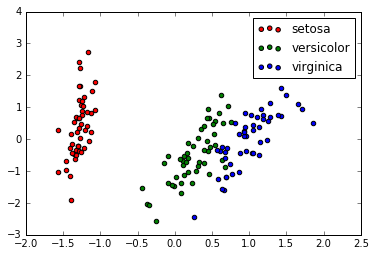

In [70]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)
plot_PCA_2D(X_rpca, iris.target, iris.target_names)